In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import stats

In [2]:
df=pd.read_csv('data/Womens Clothing E-Commerce Reviews.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)

In [3]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [5]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


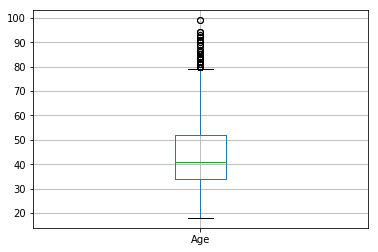

In [6]:
boxplot = df.boxplot(column=['Age'])



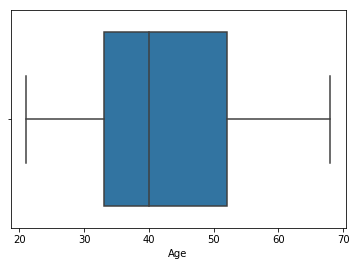

In [7]:
sns.boxplot( x=df['Age'],data=df['Age'])

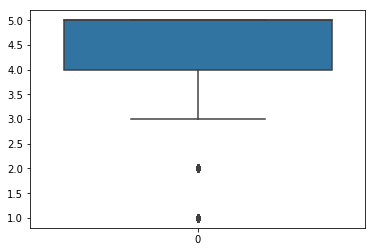

In [8]:
sns.boxplot(data=df['Rating'])

In [9]:
cloths_counts= df['Clothing ID'].value_counts()
cloths_counts

1078    1024
862      806
1094     756
1081     582
872      545
829      527
1110     480
868      430
895      404
936      358
867      351
850      338
1095     327
863      306
1077     297
1059     294
1086     291
1080     289
860      288
1083     249
861      244
873      238
828      225
1092     220
1033     220
927      214
1056     213
820      211
836      205
1022     205
        ... 
88         1
72         1
56         1
1191       1
1175       1
1183       1
1127       1
887        1
600        1
648        1
680        1
712        1
137        1
105        1
89         1
73         1
57         1
41         1
25         1
9          1
1176       1
1160       1
1032       1
856        1
808        1
792        1
776        1
744        1
728        1
0          1
Name: Clothing ID, Length: 1206, dtype: int64

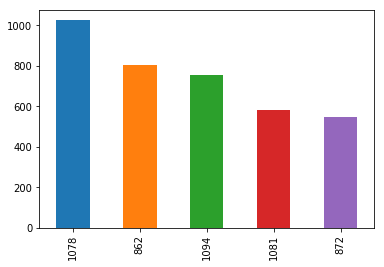

In [10]:
cloths_counts.head().plot(kind='bar')

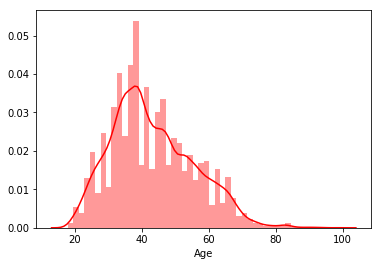

In [11]:
sns.distplot( df["Age"] , color="red", label="Age")

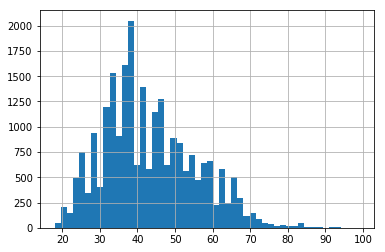

In [12]:
age_histogram= df['Age'].hist(bins=50)

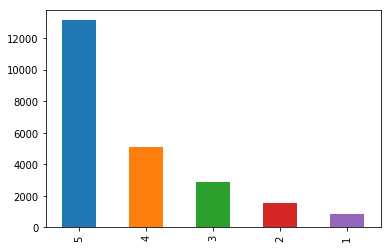

In [13]:
df['Rating'].value_counts().plot(kind='bar')

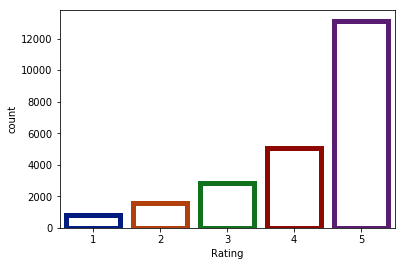

In [14]:
 sns.countplot(x="Rating", data=df,

                   facecolor=(0, 0, 0, 0),

                   linewidth=5,

                   edgecolor=sns.color_palette("dark", 5))

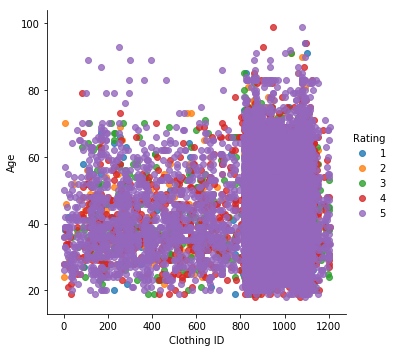

In [15]:
sns.lmplot(x="Clothing ID", y="Age", data=df, hue='Rating',fit_reg=False, legend=True)# beznadzieja

In [16]:
df['Recommended IND'].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [17]:
df.groupby('Recommended IND')['Rating'].agg('mean')

Recommended IND
0    2.303691
1    4.604794
Name: Rating, dtype: float64

In [18]:
df.groupby('Division Name')['Rating'].agg('mean')

Division Name
General           4.176606
General Petite    4.211084
Initmates         4.286285
Name: Rating, dtype: float64

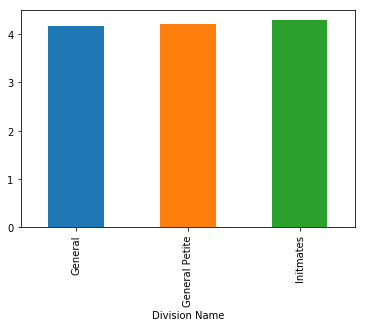

In [19]:
df.groupby('Division Name')['Rating'].agg('mean').plot(kind='bar')

In [20]:
df.groupby('Department Name')['Rating'].agg('mean')

Department Name
Bottoms     4.288760
Dresses     4.150815
Intimate    4.280115
Jackets     4.264535
Tops        4.172239
Trend       3.815126
Name: Rating, dtype: float64

In [21]:
df.groupby('Department Name')['Rating'].agg('mean')

Department Name
Bottoms     4.288760
Dresses     4.150815
Intimate    4.280115
Jackets     4.264535
Tops        4.172239
Trend       3.815126
Name: Rating, dtype: float64

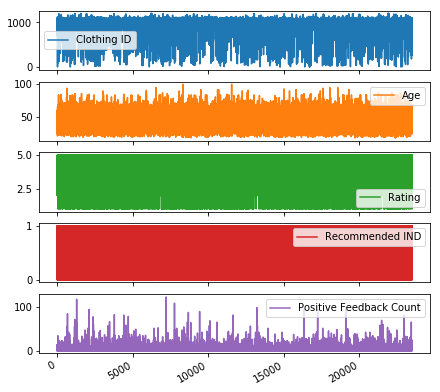

In [22]:
 df.plot(subplots=True, figsize=(7, 7)); # chyba słabo widac- wywalać

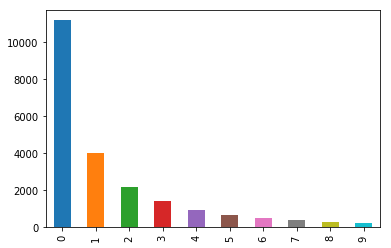

In [23]:
df['Positive Feedback Count'].value_counts().head(10).plot(kind='bar')

In [24]:
df['Division Name'].value_counts()

General           13850
General Petite     8120
Initmates          1502
Name: Division Name, dtype: int64

In [25]:
df['Department Name'].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64

In [26]:
df['Class Name'].value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

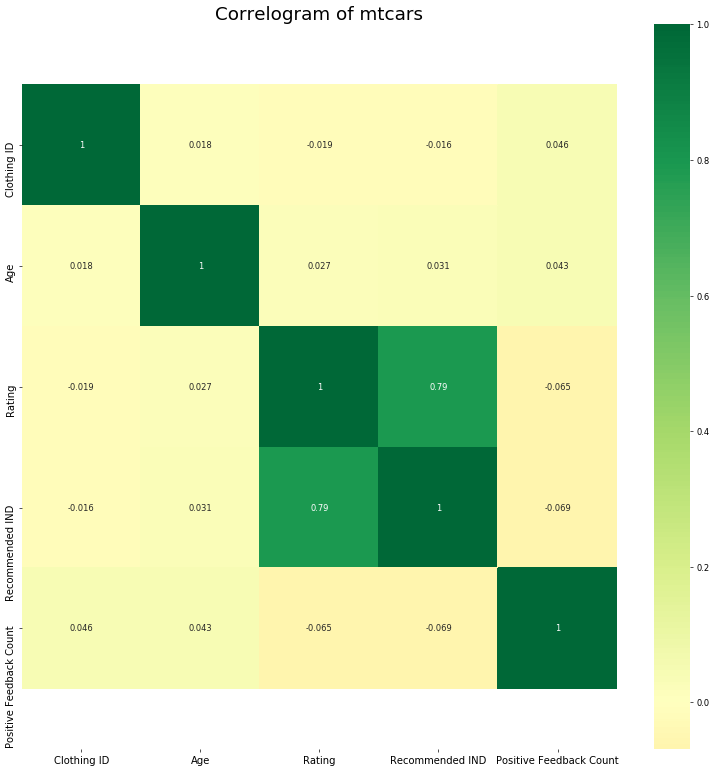

In [27]:
# Plot
plt.figure(figsize=(16, 16), dpi= 60)
ax = sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

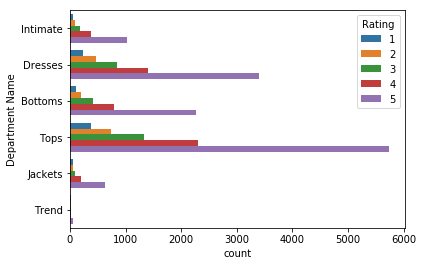

In [28]:
ax = sns.countplot(y="Department Name", hue="Rating", data=df)

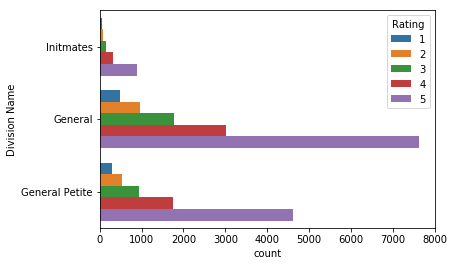

In [29]:
ax = sns.countplot(y="Division Name", hue="Rating", data=df)

In [30]:
# probny model 
labels= df['Rating']
data = df[['Age','Recommended IND']]
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels)
                                                     
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
clf.score(X_test, y_test)

0.631641689373297

In [31]:
labels= df['Rating']
data = df[['Age','Recommended IND','Positive Feedback Count']]

X_train, X_test, y_train, y_test = train_test_split(data, labels)
                                                     
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
clf.score(X_test, y_test)

0.6204019073569482

In [32]:
# #Age                        23486 non-null int64
# Title                      19676 non-null object
# Review Text                22641 non-null object
# Rating                     23486 non-null int64
# Recommended IND            23486 non-null int64
# Positive Feedback Count    23486 non-null int64
# Division Name              23472 non-null object
# Department Name            23472 non-null object
# Class Name       

In [33]:

df['Division Name'].value_counts()

General           13850
General Petite     8120
Initmates          1502
Name: Division Name, dtype: int64

In [34]:
#kategoryzacja zmiennych 

df['Division Name'].value_counts()
division_map = {
    'General': 0,
    'General Petite': 1,
    'Initmates': 2
}

df['Division Name category'] =df['Division Name'].apply(lambda x: division_map.get(x))

In [35]:
df.dropna(inplace=True)

In [36]:
labels= df['Rating']
data = df[['Age','Recommended IND','Positive Feedback Count','Division Name category']]

X_train, X_test, y_train, y_test = train_test_split(data, labels)
                                                     
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
clf.score(X_test, y_test)

0.6267290480065093

In [37]:
df['Department Name'].value_counts()

Tops        8713
Dresses     5371
Bottoms     3184
Intimate    1408
Jackets      879
Trend        107
Name: Department Name, dtype: int64

In [38]:
df['Department Name'].value_counts()
division_map = {
    'Tops': 0,
    'Dresses': 1,
    'Bottoms': 2,
    'Intimate': 3,
    'Jackets': 4,
    'Trend': 5
}

df['Department Name category'] =df['Department Name'].apply(lambda x: division_map.get(x))

In [39]:

data = df[['Age','Recommended IND','Positive Feedback Count','Division Name category','Department Name category']]

X_train, X_test, y_train, y_test = train_test_split(data, labels)
                                                     
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.score(X_test, y_test)

0.6230675345809601

In [40]:
# confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
predictions=clf.predict(X_test)
confusion_matrix(predictions, y_test)

                                

array([[   0,    0,    0,    0,    0],
       [   4,    1,    2,    0,    0],
       [ 170,  332,  366,   40,    7],
       [   0,    0,    0,    0,    4],
       [   1,   14,  237, 1042, 2696]])

In [41]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.14      0.01         7
           3       0.60      0.40      0.48       915
           4       0.00      0.00      0.00         4
           5       1.00      0.68      0.81      3990

   micro avg       0.62      0.62      0.62      4916
   macro avg       0.32      0.24      0.26      4916
weighted avg       0.92      0.62      0.74      4916



/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [42]:
df['Rating'].value_counts()

5    10858
4     4289
3     2464
2     1360
1      691
Name: Rating, dtype: int64

In [43]:
df['Review Text'][:100]

2      I had such high hopes for this dress and reall...
3      I love, love, love this jumpsuit. it's fun, fl...
4      This shirt is very flattering to all due to th...
5      I love tracy reese dresses, but this one is no...
6      I aded this in my basket at hte last mintue to...
7      I ordered this in carbon for store pick up, an...
8      I love this dress. i usually get an xs but it ...
9      I'm 5"5' and 125 lbs. i ordered the s petite t...
10     Dress runs small esp where the zipper area run...
12     More and more i find myself reliant on the rev...
13     Bought the black xs to go under the larkspur m...
14     This is a nice choice for holiday gatherings. ...
15     I took these out of the package and wanted the...
16     Material and color is nice.  the leg opening i...
17     Took a chance on this blouse and so glad i did...
18     A flattering, super cozy coat.  will work well...
19     I love the look and feel of this tulle dress. ...
20     If this product was in p

In [44]:
positive_word= ['love', 'nice']
non_positive_word=['bad']

In [45]:
df['love_count'] = df['Review Text'].apply(lambda x : x.count('love'))


In [46]:
df['love_count'].value_counts()

0    12331
1     5891
2     1199
3      203
4       30
5        7
6        1
Name: love_count, dtype: int64

In [47]:
data = df[['Age','Recommended IND','Positive Feedback Count','Division Name category','love_count']]

X_train, X_test, y_train, y_test = train_test_split(data, labels)
                                                     
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.score(X_test, y_test)

0.6137103336045565

In [48]:
# analiza sentymentu

# create the label
df["is_bad_review"] = df["Rating"].apply(lambda x: 1 if x < 4 else 0)
# select only relevant columns
reviews_df = df[["Review Text", "is_bad_review"]]
reviews_df.columns=['review','is_bad_review']
reviews_df.head()
# select small sample TO DO!
reviews_df=reviews_df[:10]

In [49]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews_df["review_clean"] = reviews_df["review"].apply(lambda x: clean_text(x))

In [50]:
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["review"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/kodolamacz/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [51]:
reviews_df["nb_chars"] = reviews_df["review"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["review"].apply(lambda x: len(x.split(" ")))

In [52]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = reviews_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)

In [54]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 5)
tfidf_result = tfidf.fit_transform(reviews_df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)

In [55]:
reviews_df["is_bad_review"].value_counts(normalize = True)

0    0.7
1    0.3
Name: is_bad_review, dtype: float64